## Chapter 4. Conceptual Excersise
From Statitical Sleuth e3

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

14. O-Ring Study to find the $t$-distributions 

In [2]:
case = pd.read_csv("./sleuth/case0401.csv")
case.head()

,Incidents,Launch
0,1,Cool
1,1,Cool
2,1,Cool
3,3,Cool
4,0,Warm


In [94]:
cool = case[case.Launch=="Cool"]["Incidents"]
warm = case[case.Launch=="Warm"]["Incidents"]

diff_mean = cool.mean() - warm.mean()
diff_mean

1.3

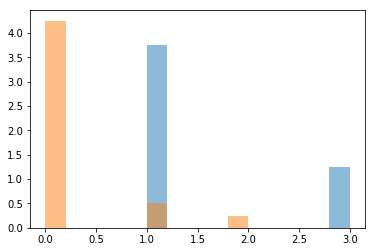

In [27]:
for col in case.Launch.unique(): 
    plt.hist(case[case.Launch==col]["Incidents"], normed=True, alpha=0.5)

C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


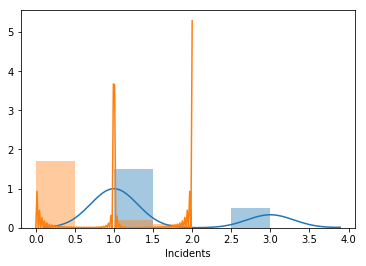

In [28]:
sns.distplot(case[case.Launch=="Cool"]["Incidents"])
sns.distplot(case[case.Launch=="Warm"]["Incidents"]);

C:\Users\phhale\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


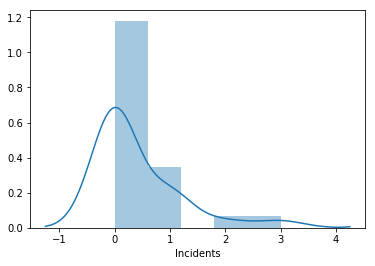

In [11]:
sns.distplot(case.Incidents)

In [97]:
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

___Mann-Whitney U Test___

In [99]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu

# two independent samples generated above: data1; data2

# compare samples
stat, p = mannwhitneyu(cool, warm)
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)

Statistics=6.000, p=0.001
Different distribution (reject H0)


So the interpretation of these reults is as follows:
* `t-statistic` valiue is 6.00 along our degrees of greedom of 22 which can be used to calculate a p-value
* `p-value` is 0.001, which is below the standard threshold of 0.05 and 0.01, therefor we __reject the null hyptohesis__ and we cna say there is a statistical significnact difference between the the incidents that occurned during the cool laucn over the warm lauch. 

Thus the $t$-distirbution approximaiton to the p-value associated with the observed $t$-stastistic is 0.001 which is less than the approximation to the permutation test p-value of 0.005

___Permutation Test___

In [85]:
cool = case[case.Launch=="Cool"]["Incidents"]
warm = case[case.Launch=="Warm"]["Incidents"]

diff_mean = cool.mean() - warm.mean()
diff_mean

1.3

In [75]:
# permutation test
def permutation_test(pooled, size1, size2, diff):
    np.random.shuffle(pooled)
    sample_1 = pooled[:size1]
    sample_2 = pooled[-size2:]
    return sample_1.mean() - sample_2.mean()

In [76]:
# http://www2.stat.duke.edu/~ar182/rr/examples-gallery/PermutationTest.html

pooled = np.hstack([cool, warm])
diff = cool.mean() - warm.mean()   # observed difference

num_samples = 10000                 # 10,000 samples
estimates = np.array(map(lambda x: permutation_test(pooled,cool.size,warm.size,diff), range(num_samples)))

diffCount = len(np.where(estimates < diff)[0])
hat_asl_perm = 1.0 - (float(diffCount)/float(num_samples))
hat_asl_perm

TypeError: '<' not supported between instances of 'map' and 'float'

In [110]:
# number of permutations required for the permutaiton test
nperm = 1000

# create list ot hold average mean values during permutation test
perm_result = []

diff_mean = cool.mean() - warm.mean()   # observed difference

pooled = np.hstack([cool, warm])

for i in range(0,nperm):
    np.random.shuffle(pooled)
    sample_1 = pooled[:cool.size]
    sample_2 = pooled[-warm.size:]
    sample_diff = sample_1.mean() - sample_2.mean()        # compute difference in sample menas
    perm_result.append(sample_diff)
    
print("Number of values greater than the observed mean difference: ", len([i for i in perm_result if i > diff_mean]))

Number of values greater than the observed mean difference:  1


In [111]:
hat_asl_perm = (float(len([i for i in perm_result if i > diff_mean]))/float(nperm))
hat_asl_perm

0.001

### Therapeutic Marijuana Question

Does marijuana te

    21. Trauma and Metabolic Expenditure. Use a statistical computer package to verify the rank-sum and the Z-statistic obtained in Exercise 20. Is the p-value the same? (Does the statistical package use a continuity correction?) 

In [112]:
treatment_group = [3, 5, 6]
control_grou = [1, 2, 4]

In [ ]:
# normal distribution of the sum of ranks


In [113]:
stat, p = mannwhitneyu(treatment_group, control_grou)
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)

Statistics=1.000, p=0.095
Same distribution (fail to reject H0)
